---
title: Getting started
description: A typical workflow with the package, creating a single table
---

In this tutorial, we go over the typical sort of interaction a user will have
with the package: retrieving a table from the API.

## Making a connection

We begin by importing the `CensusAPI` class from the package and creating an
instance of it. This class is how we connect to the custom table creator API.

In [1]:
from census21api import CensusAPI

api = CensusAPI()

## Defining a query

Now, to query a table, we need three parameters:

- a population type (e.g. household reference persons, usual residents)
- an area type (e.g. local authorities, Senedd electoral regions)
- some dimensions (e.g. english proficiency, economic activity)

Let's say we are interested in the relationship between binary sex and health
across the regions of England and Wales. Then our parameters are:

- population type: usual residents in the UK
- area type: region
- dimensions: sex and health in general


## Retrieving a table

With that information, we can use our `CensusAPI` instance to retrieve the
corresponding table from the API using its `query_table()` method:

In [2]:
population_type = "UR"
area_type = "rgn"
dimensions = ("sex", "health_in_general")

table = api.query_table(population_type, area_type, dimensions, use_id=False)
table

,rgn,sex,health_in_general,count,population_type
0,North East,Female,Does not apply,0,UR
1,North East,Female,Very good health,589597,UR
2,North East,Female,Good health,454204,UR
3,North East,Female,Fair health,209830,UR
4,North East,Female,Bad health,77783,UR
...,...,...,...,...,...
115,Wales,Male,Very good health,722822,UR
116,Wales,Male,Good health,490429,UR
117,Wales,Male,Fair health,210031,UR
118,Wales,Male,Bad health,73638,UR


## Visualising your results

You now have your table as a `pandas.DataFrame` object - you are free to store
or analyse it as you see fit. Excellent!

As an example, let's make a faceted bar plot with our results.

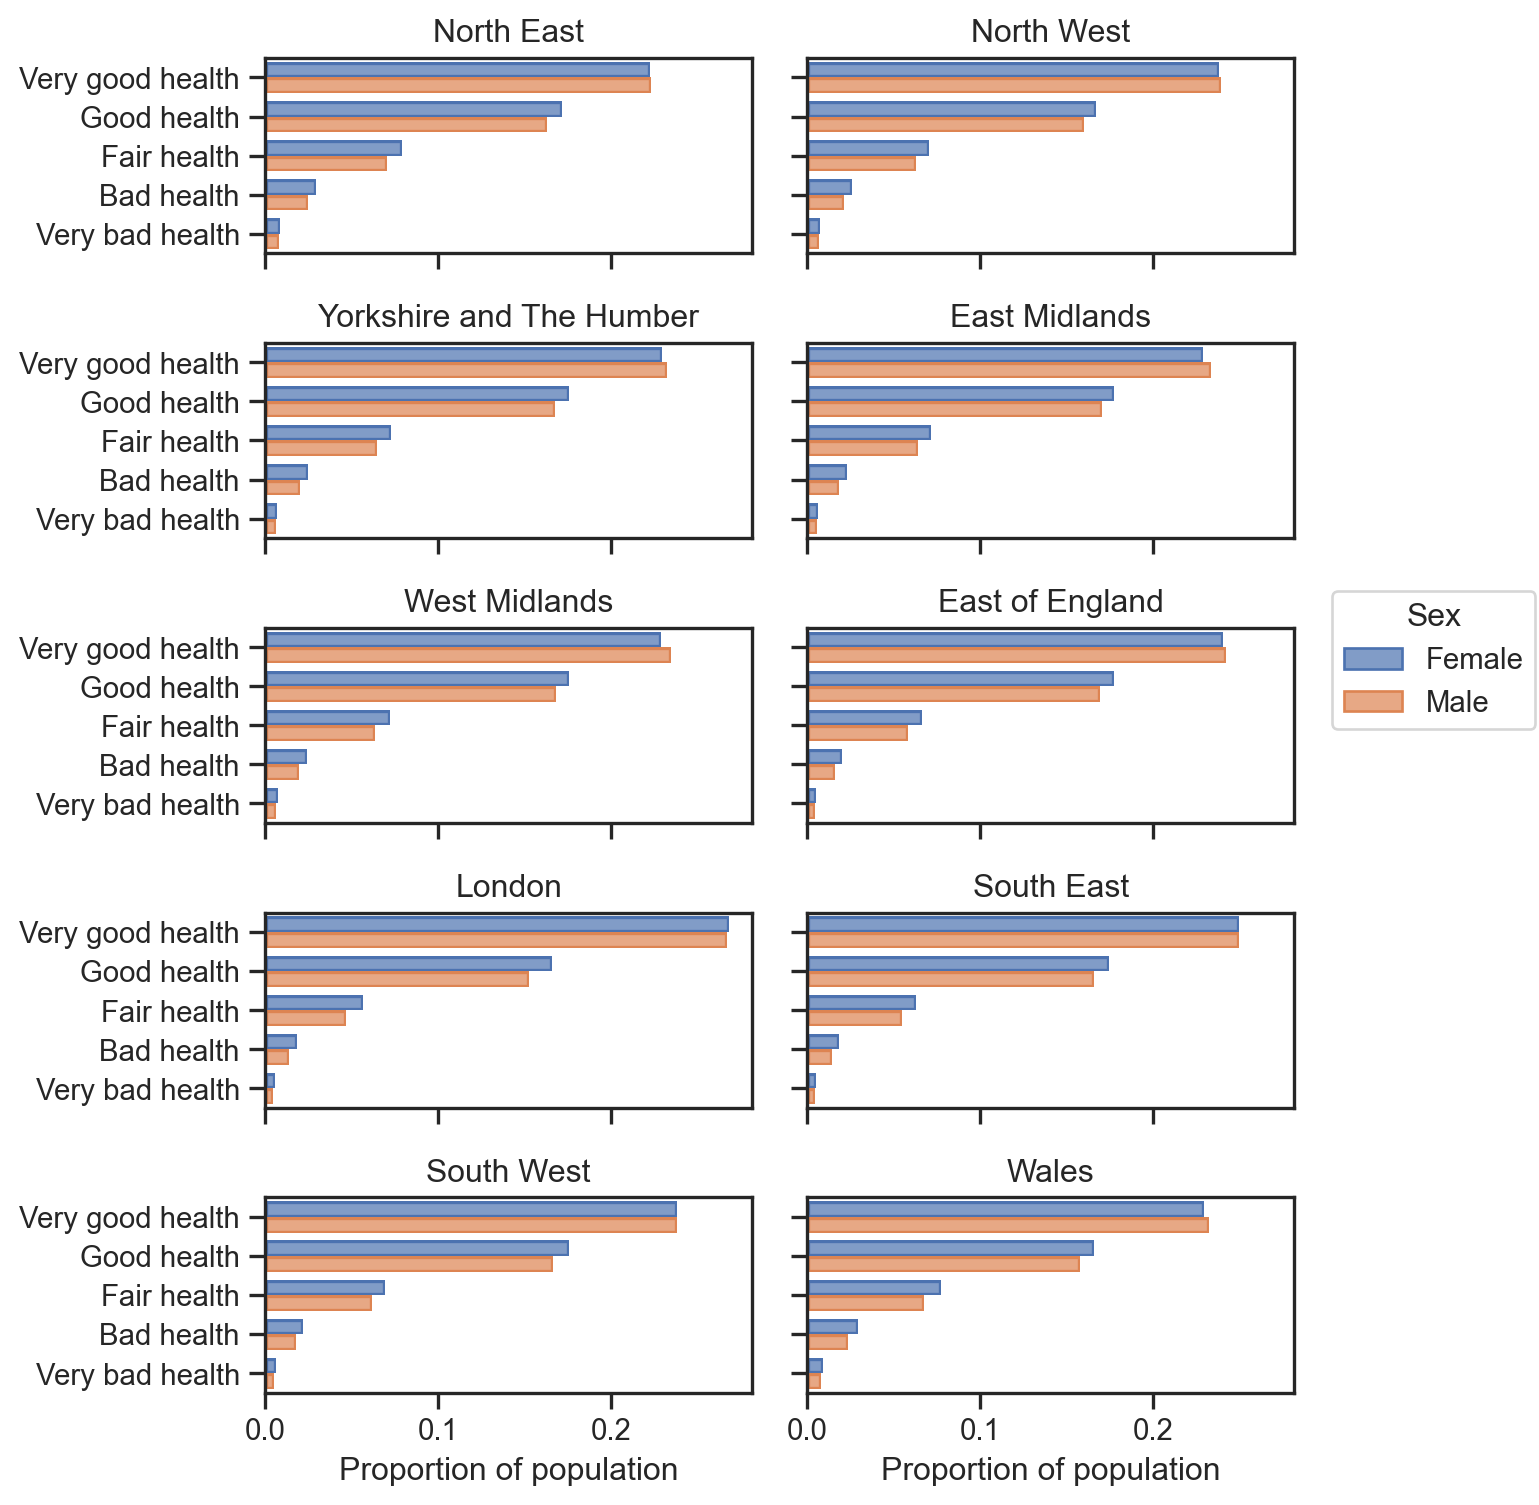

In [5]:
import seaborn.objects as so
from seaborn import axes_style


table["prop"] = table["count"] / table.groupby("rgn")["count"].transform("sum")
table = table[table["health_in_general"] != "Does not apply"]

(
    so.Plot(table, y="health_in_general", x="prop", color="sex")
    .facet("rgn", wrap=2)
    .add(so.Bar(), so.Dodge())
    .label(x="Proportion of population", y="", color=str.title)
    .theme(axes_style("ticks"))
    .layout(size=(7, 8), engine="tight")
)